# CCTV와 범죄율의 관계

## 서울시 구별 CCTV 현황 분석

### 1. CCTV현황과 인구현황 데이터를 구하고 정제하기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
# cctv 자료 불러오기
cctv_seoul = pd.read_csv("data/seoul/cctv.csv")
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [4]:
# 컬럼 중에 '기관명' -> '구별' 로 바꾸자
cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별'}, inplace=True)
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [19]:
# 인구 데이터 불러오기
# pop_seoul = pd.read_excel("data/seoul/Report.xls")    # excel파일 불러오는 메서드: read_excel()

# 옵션주기
pop_seoul = pd.read_excel("data/seoul/Report.xls", header=2, usecols="B, D, G, J, N")  # 알파벳: 엑셀파일에서 확인되는 열이름
pop_seoul.head(10)

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470
6,동대문구,364962,349308,15654,56284
7,중랑구,411552,406868,4684,59992
8,성북구,453902,442226,11676,66896
9,강북구,327511,323862,3649,57002


In [20]:
# 인구데이터 컬럼명 변경
pop_seoul.rename(columns={
    pop_seoul.columns[0]:'구별', pop_seoul.columns[1]:'인구수', pop_seoul.columns[2]:'한국인', 
    pop_seoul.columns[3]:'외국인', pop_seoul.columns[4]:'고령자'
}, inplace=True)

pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


### 2. 데이터 파악하기

In [13]:
# cctv 데이터에서 소계를 기준으로 정렬(오름차순)
cctv_seoul.sort_values(by="소계", ascending=True).head()    # by를 써서 소계를 기준으로 정렬되도록
cctv_seoul.sort_values(by="소계", ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
18,양천구,2482,1843,142,30,467,34.671731
14,서초구,2297,1406,157,336,398,63.371266
4,관악구,2109,846,260,390,613,149.290780
21,은평구,2108,1138,224,278,468,85.237258


In [14]:
# 증가율( (2014+2015+2016)/2013 이전)을 구해서 "최근증가율"이란 컬럼으로 추가
cctv_seoul["최근증가율"] = (cctv_seoul["2016년"] + cctv_seoul["2015년"] + cctv_seoul["2014년"])/cctv_seoul["2013년도 이전"] * 100
cctv_seoul.sort_values(by="최근증가율", ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


In [21]:
# 인구데이터에서 첫번쨰 행을 삭제
pop_seoul.head()
pop_seoul.drop([0], inplace=True)  # drop을 무효시키는 방법은 없고 걍 파일실행다시해서 하면 됌

In [17]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470


In [22]:
# nan 유무 확인
pop_seoul["구별"].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [23]:
pop_seoul[pop_seoul["구별"].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,0,0,0,0


In [24]:
# nan 처리
pop_seoul.drop([26], inplace=True)

In [26]:
pop_seoul["구별"].unique()
pop_seoul[pop_seoul["구별"].isnull()]

,구별,인구수,한국인,외국인,고령자


In [28]:
pop_seoul.sort_values(by="인구수", ascending=True).head()
pop_seoul.sort_values(by="인구수", ascending=False).head()

,구별,인구수,한국인,외국인,고령자
24,송파구,671994,665282,6712,77978
16,강서구,608361,601696,6665,77381
23,강남구,557865,552976,4889,65859
11,노원구,555803,551902,3901,75081
21,관악구,522292,504445,17847,70807


In [30]:
# 외국인, 고령자 인구수 대비 비율
# 외국인 비율, 고령자 비율 컬럼 추가
pop_seoul["외국인비율"] = (pop_seoul["외국인"]/pop_seoul["인구수"]) * 100
pop_seoul["고령자비율"] = (pop_seoul["고령자"]/pop_seoul["인구수"]) * 100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164348,154549,9799,26429,5.962348,16.081121
2,중구,135139,126082,9057,21655,6.701988,16.024242
3,용산구,245411,229909,15502,37238,6.316750,15.173729
4,성동구,314551,306532,8019,41752,2.549348,13.273523
5,광진구,371671,357149,14522,44470,3.907219,11.964883


In [36]:
#pop_seoul.sort_values(by="외국인", ascending=False).head()
pop_seoul.sort_values(by="고령자비율", ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,327511,323862,3649,57002,1.114161,17.404606
1,종로구,164348,154549,9799,26429,5.962348,16.081121
2,중구,135139,126082,9057,21655,6.701988,16.024242
10,도봉구,345041,342861,2180,54293,0.631809,15.735231
6,동대문구,364962,349308,15654,56284,4.289214,15.421880


### 3. CCTV데이터와 인구데이터를 합치고 분석하기

In [38]:
# 두 데이터간의 공통점을 찾는다 => '구별' 이라는 키 
# merge로 병합해준다

In [37]:
data_result = pd.merge(cctv_seoul, pop_seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,379,99,155,377,166.490765,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,369,120,138,204,125.203252,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,388,258,184,81,134.793814,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,846,260,390,613,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [41]:
# 2013년도 이전~ 2016년 까지의 컬럼삭제 (필요없는 자료 삭제)
# 컬럼 삭제 : drop(행삭제), del(열삭제)
# del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [42]:
# "구별"컬럼을 인덱스로 설정
data_result.set_index("구별", inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [43]:
# 상관분석 : 변수간의 관계 분석 (수치 -1 ~ 1 사이, 음의 관계, 양의 관계)
# 소계(cctv) - 인구수, 외국인, 고령자 상관분석, numpy 제공 메서드 이용(corrcoef)
# 일반적으로 0.3 이상일 때 관계가 있구나~ 하고 본다 ( 0.3이상 : 약한 관계  0.7이상: 강한 관계 )

print(np.corrcoef(data_result["고령자비율"], data_result["소계"]))
print(np.corrcoef(data_result["외국인비율"], data_result["소계"]))
print(np.corrcoef(data_result["인구수"], data_result["소계"]))

[[ 1.         -0.26783452]
 [-0.26783452  1.        ]]
[[ 1.         -0.04656978]
 [-0.04656978  1.        ]]
[[1.         0.23037183]
 [0.23037183 1.        ]]


In [44]:
data_result.sort_values(by="소계", ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
양천구,2482,34.671731,473087,469221,3866,56070,0.817186,11.851943
서초구,2297,63.371266,445164,440954,4210,54055,0.945719,12.142716
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976
은평구,2108,85.237258,490253,485902,4351,75535,0.887501,15.407351


In [45]:
data_result.sort_values(by="인구수", ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,1081,104.347826,671994,665282,6712,77978,0.998818,11.603973
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
노원구,1566,188.929889,555803,551902,3901,75081,0.701867,13.508563
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976


### 4. CCTV현황 데이터로 그래프 분석

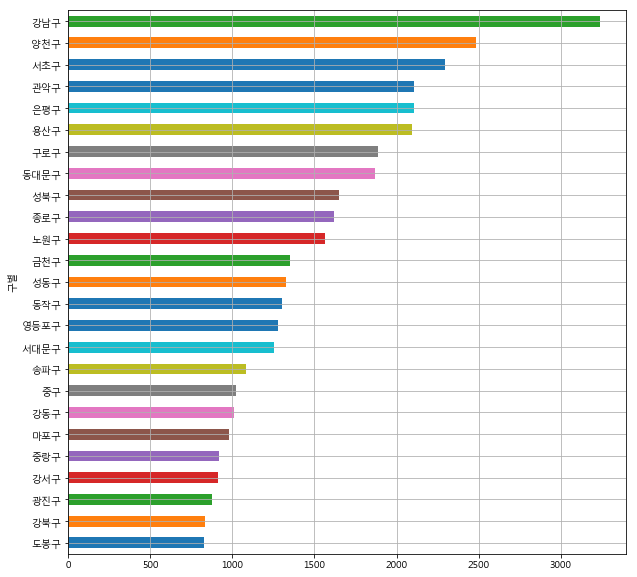

In [51]:
# data_result["소계"].plot(kind="barh", figsize=(10,10), grid=True)   # grid: 눈금
data_result["소계"].sort_values().plot(kind="barh", figsize=(10,10), grid=True)  # sort_value로 정렬해주기

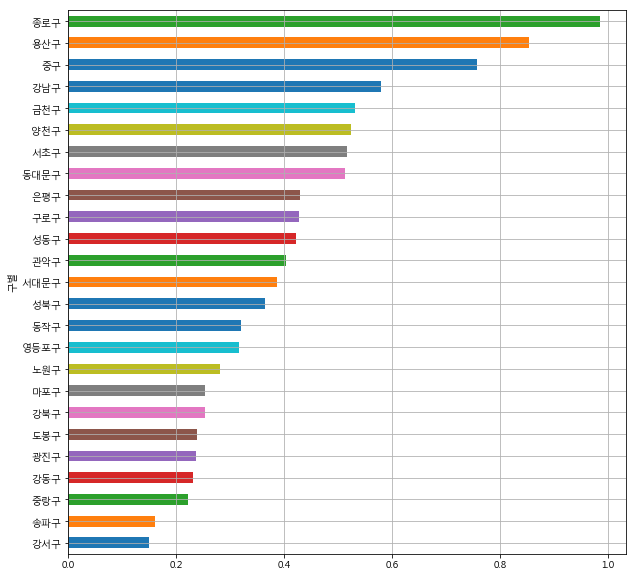

In [54]:
# cctv 비율
data_result["cctv비율"] = data_result["소계"] / data_result["인구수"]*100
data_result.head()
data_result["cctv비율"].sort_values().plot(kind="barh", figsize=(10,10), grid=True)

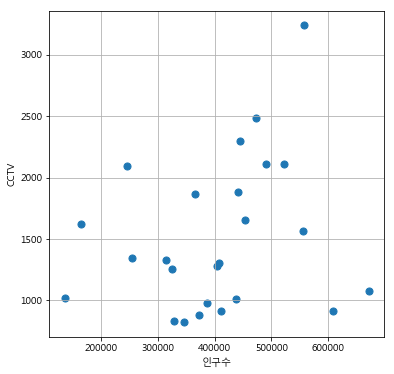

In [60]:
# 위 그래프 만으로는 분석이 부족하니까 산포도도 그려보자
plt.figure(figsize= (6,6))
plt.scatter(data_result["인구수"], data_result["소계"], s=50)
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()

In [ ]:
'''
통계 분석
    평균 차이 검정
        집단의 갯수
            2개 이하: T-test
            3개 이상 : ANOVA
    관계 검정
        명목변수 : 교차분석(카이제곱분석)
        1:1 : 상관분석 (두 변수간의 관계 분석)
        1:N : 회귀분석 (분포를 대표할 수 있는 직선을 찾는다.)   

'''

In [61]:
# 최소제곱법을 구현하는 알고리즘 메서드 , 최적의 직선 찾기
# p = polyfit(x,y,n)은 y의 데이터에 대한 최적의 피팅(최소제곱 관점에서)인 n차 다항식 p(x)의 계수를 반환합니다. 
# p의 계수는 내림차순으로 나열되고, p의 길이는 n+1입니다.
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)  # 소계에 대한 최적의 피팅인 1차 다항식 p(인구수)의 계수반환
fp1
# array([1.10432363e-03, 1.06864009e+03]) = [기울기a, 절편b]  (y= ax+b)

array([1.10432363e-03, 1.06864009e+03])

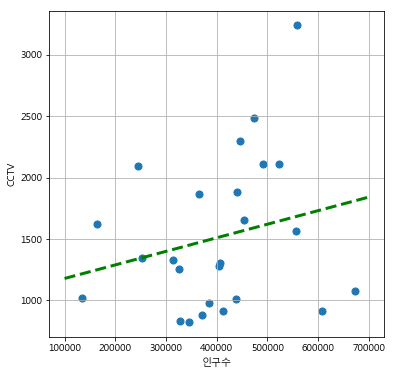

In [63]:
# 기울기와 절편을 넘겨받아 최적의 방정식을 만든다 : poly1d
# 직선그릴때 plot 메서드 쓴다
f1 = np.poly1d(fp1)    # 방정식
fx = np.linspace(100000, 700000, 100)    # x좌표값

plt.figure(figsize= (6,6))
plt.scatter(data_result["인구수"], data_result["소계"], s=50)
plt.plot(fx, f1(fx), lw=3, color="g", ls='dashed')    # x값, y값
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()
# 회귀선 짜란- (y = ax + b)

In [69]:
# ploy1d 사용법
a = np.poly1d([1,2])
#print(a)

b = np.poly1d([1, 2, 3])
print(b)

   2
1 x + 2 x + 3


In [70]:
data_result["오차"] = np.abs(data_result["소계"] - f1(data_result["인구수"]))   # abs : 절대값인거 잊지말기
df_sort = data_result.sort_values(by="오차", ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,0.580427,1553.296412
양천구,2482,34.671731,473087,469221,3866,56070,0.817186,11.851943,0.524639,890.918761
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,0.149747,829.467513
용산구,2096,53.216374,245411,229909,15502,37238,6.316750,15.173729,0.854077,756.346747
서초구,2297,63.371266,445164,440954,4210,54055,0.945719,12.142716,0.515990,736.754790


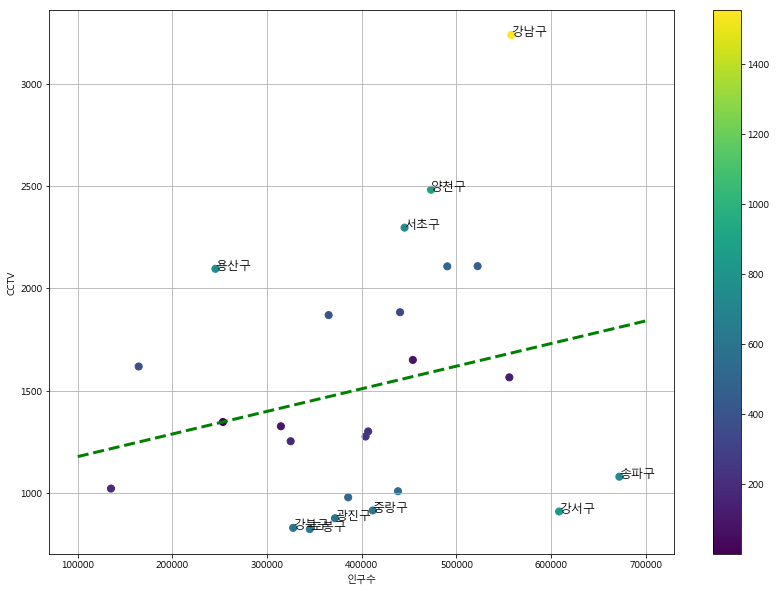

In [75]:
plt.figure(figsize= (14,10))
plt.scatter(data_result["인구수"], data_result["소계"], s=50, c=data_result["오차"])  # 오차에 색깔준다
plt.plot(fx, f1(fx), lw=3, color="g", ls='dashed')    # x값, y값
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()
plt.colorbar()

for n in range(10):
    plt.text(df_sort["인구수"][n], df_sort["소계"][n], df_sort.index[n], fontsize=12)

In [76]:
#지금까지의 분석 결과물 파일로 저장하기
df_sort.to_csv("data/seoul/cctv_result.csv", sep=",", encoding='utf8')